In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import restaurant violation raw data set

violations_df = pd.read_csv("Dept_of_Health/DOHMH_New_York_City_Restaurant_Inspection_Results.csv")
violations_df["CRITICAL FLAG"].unique()

array(['Critical', 'Not Critical', 'Not Applicable'], dtype=object)

In [3]:
# clean data frame so that it is easier to work with

violations_df = violations_df[["INSPECTION DATE","CRITICAL FLAG"]]
violations_df["year"] = pd.DatetimeIndex(violations_df["INSPECTION DATE"]).year
violations_df["year"].unique()

array([2015, 2014, 2016, 2017, 2013, 1900, 2012, 2011], dtype=int64)

In [4]:
# drop years that didn't make sense 

violations_df = violations_df.loc[violations_df["year"] != 1900,:]
violations_df = violations_df.loc[violations_df["year"] != 2011,:]
violations_df = violations_df.loc[violations_df["year"] != 2012,:]

In [61]:
# make 

critical = violations_df.loc[violations_df["CRITICAL FLAG"] == "Critical",:].drop(columns = ["CRITICAL FLAG"])
not_critical = violations_df.loc[violations_df["CRITICAL FLAG"] == "Not Critical",:].drop(columns = ["CRITICAL FLAG"])
not_applicable = violations_df.loc[violations_df["CRITICAL FLAG"] == "Not Applicable",:].drop(columns = ["CRITICAL FLAG"])
critical = critical.groupby(["year"]).count()
not_critical = not_critical.groupby(["year"]).count()
not_applicable = not_applicable.groupby(["year"]).count()
merge = pd.merge(critical,not_critical,on='year',suffixes=[" critical"," not_critical"])
merge = pd.merge(merge, not_applicable, on='year')
merge

,INSPECTION DATE critical,INSPECTION DATE not_critical,INSPECTION DATE
year,,,
2013,3078,2484,148
2014,44238,35257,1489
2015,64138,51083,1725
2016,64408,50062,1583
2017,44215,33967,897


In [65]:
merge = merge.rename(columns = {"INSPECTION DATE critical":"Critical Violations",
                        "INSPECTION DATE not_critical":"Not Critical Violations",
                        "INSPECTION DATE":"NA Violations"})
x_axis = ["2013","2014","2015","2016","2017"]

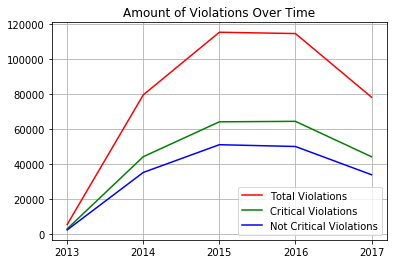

In [79]:
plt.plot(x_axis, merge["Not Critical Violations"] + merge["Critical Violations"], color="red", label="Total Violations")
plt.plot(x_axis, merge["Critical Violations"], color="green", label="Critical Violations")
plt.plot(x_axis, merge["Not Critical Violations"], color="blue", label="Not Critical Violations")
plt.grid()
plt.title("Amount of Violations Over Time")
plt.legend()
plt.savefig("Violations_Over_Time.png")